**Yoga Pose Classification**


**Installing requirements**

In [ ]:
!pip3 install git+https://github.com/ultralytics/ultralytics.git
#The command you provided is installing a Python package directly from a GitHub repository using pip.
#'git+https://github.com/ultralytics/ultralytics.git: This is the URL of the GitHub repository containing the package you want to install. Pip is instructed to clone this repository and install the package from there.

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-xlyhsglw
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-xlyhsglw
  Resolved https://github.com/ultralytics/ultralytics.git to commit 36408c974c844f9885ff50320ebfa32162828d32
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.20-py3-none-any.whl size=716451 sha256=f7437f877ccc845aa61255d166d2d17b6737d7e37c97f9ee99529641477d91c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-31677x8h/wheels/45/25/b9/9f1e3857f58c296e7854ef871c3f5a15d519cc6c679848df8e
Successfully built ultralytics


In [ ]:
!pip3 install kaggle opendatasets
#This command is using pip, the package installer for Python, to install two Python packages: kaggle and opendatasets
#kaggle: This package is a Python client for the Kaggle API
#This package provides a simple interface to download datasets from various sources, including Kaggle.

**Downloading Dataset**
- Download Yoga Pose Image Dataset from Kaggle Public Dataset
- This has 5 yoga poses
- https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: datawhizml
Your Kaggle Key: ··········


100%|██████████| 15.0M/15.0M [00:00<00:00, 104MB/s] 

**Yolov8 Pose**

In [ ]:
import cv2
from PIL import Image
from pydantic import BaseModel
import ultralytics

In [ ]:
model = ultralytics.YOLO(model="yolov8m-pose.pt")

100%|██████████| 50.8M/50.8M [00:00<00:00, 169MB/s]


In [ ]:
image = cv2.imread('/content/yoga-pose-classification/YogaPoses/Plank/00000006.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy


0: 480x640 1 person, 1193.1ms
Speed: 3.3ms preprocess, 1193.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


tensor([[ 46.,  61., 289., 199.]])

In [ ]:
result.keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.7899, 0.7937, 0.2482, 0.9449, 0.1217, 0.9980, 0.9811, 0.9925, 0.8230, 0.9281, 0.5657, 0.9987, 0.9965, 0.9950, 0.9875, 0.9579, 0.9409]])
data: tensor([[[5.8633e+01, 1.0204e+02, 7.8991e-01],
         [5.8660e+01, 9.6928e+01, 7.9370e-01],
         [0.0000e+00, 0.0000e+00, 2.4820e-01],
         [6.6185e+01, 8.8961e+01, 9.4487e-01],
         [0.0000e+00, 0.0000e+00, 1.2168e-01],
         [8.2417e+01, 1.0121e+02, 9.9797e-01],
         [9.0888e+01, 1.0272e+02, 9.8112e-01],
         [8.8254e+01, 1.4779e+02, 9.9248e-01],
         [1.0569e+02, 1.3726e+02, 8.2298e-01],
         [8.5369e+01, 1.8061e+02, 9.2814e-01],
         [1.0019e+02, 1.7714e+02, 5.6567e-01],
         [1.5619e+02, 1.1308e+02, 9.9870e-01],
         [1.5919e+02, 1.1963e+02, 9.9649e-01],
         [1.9825e+02, 1.4229e+02, 9.9502e-01],
         [1.9652e+02, 1.4273e+02, 9.8752e-01],
         [2.6905e+02, 1.5905e+02, 9.5790e-01],
         [2.6966e+02, 1.594

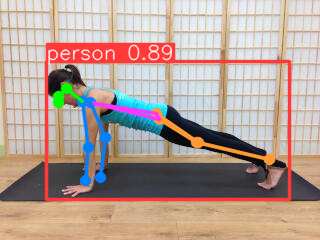

In [ ]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

**Generate Dataset**
Yolov8 pose estimation memiliki 17 keypoint

- NOSE: int = 0
- LEFT_EYE: int = 1
- RIGHT_EYE: int = 2
- LEFT_EAR: int = 3
- RIGHT_EAR: int = 4
- LEFT_SHOULDER: int = 5
- RIGHT_SHOULDER: int = 6
- LEFT_ELBOW: int = 7
- RIGHT_ELBOW: int = 8
- LEFT_WRIST: int = 9
- RIGHT_WRIST: int = 10
- LEFT_HIP: int = 11
- RIGHT_HIP: int = 12
- LEFT_KNEE: int = 13
- RIGHT_KNEE: int = 14
- LEFT_ANKLE: int = 15
- RIGHT_ANKLE: int = 16

In [ ]:
class GetKeypoint(BaseModel):
  NOSE: int = 0
  LEFT_EYE: int = 1
  RIGHT_EYE: int = 2
  LEFT_EAR: int = 3
  RIGHT_EAR: int = 4
  LEFT_SHOULDER: int = 5
  RIGHT_SHOULDER: int = 6
  LEFT_ELBOW: int = 7
  RIGHT_ELBOW: int = 8
  LEFT_WRIST: int = 9
  RIGHT_WRIST: int = 10
  LEFT_HIP: int = 11
  RIGHT_HIP: int = 12
  LEFT_KNEE: int = 13
  RIGHT_KNEE: int = 14
  LEFT_ANKLE: int = 15
  RIGHT_ANKLE: int = 16

In [ ]:
get_keypoint = GetKeypoint()

In [ ]:
import os
import glob

In [ ]:
dataset_root = "/content/yoga-pose-classification/YogaPoses"
pose_list = os.listdir(dataset_root)
pose_list

['Tree', 'Plank', 'Goddess', 'Warrior2', 'Downdog']

In [ ]:
def extract_keypoint(keypoint):
  #nose
  nose_x,nose_y = keypoint[get_keypoint.NOSE]
  #eye
  left_eye_x,left_eye_y = keypoint[get_keypoint.LEFT_EYE]
  right_eye_x,right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
  #ear
  left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
  right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
  # shoulder
  left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
  right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
  # elbow
  left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
  right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
  # wrist
  left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
  right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
  # hip
  left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
  right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
  # knee
  left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
  right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
  # ankle
  left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
  right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]
  return [
      nose_x, nose_y,
      left_eye_x, left_eye_y,
      right_eye_x, right_eye_y,
      left_ear_x, left_ear_y,
      right_ear_x, right_ear_y,
      left_shoulder_x, left_shoulder_y,
      right_shoulder_x, right_shoulder_y,
      left_elbow_x, left_elbow_y,
      right_elbow_x, right_elbow_y,
      left_wrist_x, left_wrist_y,
      right_wrist_x, right_wrist_y,
      left_hip_x, left_hip_y,
      right_hip_x, right_hip_y,
      left_knee_x, left_knee_y,
      right_knee_x, right_knee_y,
      left_ankle_x, left_ankle_y,
      right_ankle_x, right_ankle_y
  ]

**Run Image**

In [ ]:
dataset_csv = []
for pose in pose_list:
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        # get image_name
        image_name = image_path.split('/')[-1]
        # read numpy image
        image = cv2.imread(image_path)
        # get height width image
        height, width = image.shape[:2]

        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 17:
                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)


0: 640x416 1 person, 1190.2ms
Speed: 2.8ms preprocess, 1190.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)

0: 640x256 1 person, 671.1ms
Speed: 1.8ms preprocess, 671.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 256)

0: 640x416 1 person, 1029.1ms
Speed: 2.7ms preprocess, 1029.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)

0: 640x448 1 person, 1110.7ms
Speed: 2.9ms preprocess, 1110.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 1130.7ms
Speed: 3.6ms preprocess, 1130.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)

0: 640x480 1 person, 1183.3ms
Speed: 2.9ms preprocess, 1183.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 1 person, 953.3ms
Speed: 2.6ms preprocess, 953.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 person, 1115.8ms
Speed: 2.9ms preprocess, 1115.8ms inference, 1.1ms postprocess 

In [ ]:
import csv
# write csv
header = [
    'image_name',
    'label',
    # nose
    'nose_x',
    'nose_y',
    # left eye
    'left_eye_x',
    'left_eye_y',
    # right eye
    'right_eye_x',
    'right_eye_y',
    # left ear
    'left_ear_x',
    'left_ear_y',
    # right ear
    'right_ear_x',
    'right_ear_y',
    # left shoulder
    'left_shoulder_x',
    'left_shoulder_y',
    # right sholder
    'right_shoulder_x',
    'right_shoulder_y',
    # left elbow
    'left_elbow_x',
    'left_elbow_y',
    # rigth elbow
    'right_elbow_x',
    'right_elbow_y',
    # left wrist
    'left_wrist_x',
    'left_wrist_y',
    # right wrist
    'right_wrist_x',
    'right_wrist_y',
    # left hip
    'left_hip_x',
    'left_hip_y',
    # right hip
    'right_hip_x',
    'right_hip_y',
    # left knee
    'left_knee_x',
    'left_knee_y',
    # right knee
    'right_knee_x',
    'right_knee_y',
    # left ankle
    'left_ankle_x',
    'left_ankle_y',
    # right ankle
    'right_ankle_x',
    'right_ankle_y'
]

with open('yoga_pose_keypoint.csv','w',encoding='UTF8',newline='') as file:
  writer = csv.writer(file)
  #header
  writer.writerow(header)
  #multiple rows of the dataset
  writer.writerows(dataset_csv)

**Write Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('yoga_pose_keypoint.csv')
df

,image_name,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,00000039.jpg,Tree,0.460442,0.224426,0.471696,0.217091,0.444828,0.219293,0.489389,0.221562,...,0.402871,0.383885,0.466238,0.486900,0.319184,0.434537,0.470552,0.571454,0.432110,0.489985
1,00000162.jpg,Tree,0.498956,0.114720,0.532941,0.093855,0.443886,0.105086,0.589584,0.100643,...,0.359777,0.489648,0.550866,0.726233,0.331466,0.645592,0.531371,0.873345,0.469849,0.710114
2,00000120.jpg,Tree,0.504092,0.307959,0.523720,0.294460,0.477996,0.300783,0.551815,0.295124,...,0.429034,0.551216,0.524448,0.753899,0.282319,0.637142,0.519573,0.860057,0.432728,0.673614
3,00000184.jpg,Tree,0.506847,0.310616,0.522093,0.296808,0.476727,0.306266,0.546020,0.297150,...,0.426817,0.556009,0.528187,0.744885,0.279149,0.637735,0.521689,0.850936,0.430184,0.665167
4,00000006.jpg,Tree,0.492941,0.182007,0.515733,0.169435,0.471422,0.163748,0.554622,0.176625,...,0.412745,0.517340,0.719995,0.584410,0.463209,0.706158,0.515440,0.649135,0.470527,0.834738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,00000173.jpg,Downdog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.585018,0.303169,0.604105,0.303028,0.697185,0.419483,0.584942,0.573118,0.823097,0.709490
1000,00000083.jpg,Downdog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.434007,0.434249,0.376250,0.621489,0.322179,0.645881,0.311426,0.786689,0.203427,0.861570
1001,00000165.jpg,Downdog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.529808,0.530025,0.520688,0.656990,0.449886,0.653804,0.515063,0.753525,0.362898,0.757382
1002,00000158.jpg,Downdog,0.501036,0.618552,0.489631,0.604879,0.505752,0.619024,0.481200,0.578406,...,0.650028,0.359095,0.710942,0.407487,0.759366,0.466637,0.877453,0.675966,0.851092,0.709518


In [ ]:
from google.colab import files
files.download('/content/yoga-pose-classification/YogaPoses/Plank/00000006.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>